# Proyek Akhir : Image Classification Model Deployment

- Nama: Hafiizh Taufiqul Hakim
- Email: 2012500720@student.budiluhur.ac.id
- Id Dicoding: hafizhtaufiqul1002

### Dataset (bottle-synthetic-images)

In [ ]:
# Install kaggle
!pip install -q kaggle

In [ ]:
# Import file kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hafiizhtaufiqulhakim","key":"b441c5f30c1c72eaf41d95ebbb477fcc"}'}

In [ ]:
# Download dataset
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download -d vencerlanz09/bottle-synthetic-images-dataset

 99% 1.24G/1.26G [00:15<00:00, 33.8MB/s]
100% 1.26G/1.26G [00:15<00:00, 86.6MB/s]


In [ ]:
# Ekstrak dataset
!mkdir bottle-images
!unzip -qq bottle-synthetic-images-dataset.zip -d bottle-images
!ls bottle-images

'Bottle Images'   ImageClassesCombinedWithCOCOAnnotations


### Load Data

In [ ]:
base_dir = '/content/bottle-images/Bottle Images/Bottle Images'
os.listdir(base_dir)

['Soda Bottle',
 'Wine Bottle',
 'Beer Bottles',
 'Water Bottle',
 'Plastic Bottles']

In [ ]:
file_name = []
label = []
file_path = []
for path, subdirs, files in os.walk(base_dir):
    for name in files:
        file_path.append(os.path.join(path, name))
        label.append(path.split('/')[-1])
        file_name.append(name)

In [ ]:
import pandas as pd

df = pd.DataFrame({"filepath":file_path,'filename':file_name,"label":label})
df.groupby(['label']).size()

label
Beer Bottles       5000
Plastic Bottles    5000
Soda Bottle        5000
Water Bottle       5000
Wine Bottle        5000
dtype: int64

In [ ]:
df.head()

,filepath,filename,label
0,/content/bottle-images/Bottle Images/Bottle Im...,00003248.jpg,Soda Bottle
1,/content/bottle-images/Bottle Images/Bottle Im...,00003751.jpg,Soda Bottle
2,/content/bottle-images/Bottle Images/Bottle Im...,00001808.jpg,Soda Bottle
3,/content/bottle-images/Bottle Images/Bottle Im...,00000873.jpg,Soda Bottle
4,/content/bottle-images/Bottle Images/Bottle Im...,00003265.jpg,Soda Bottle


##### Preview Image

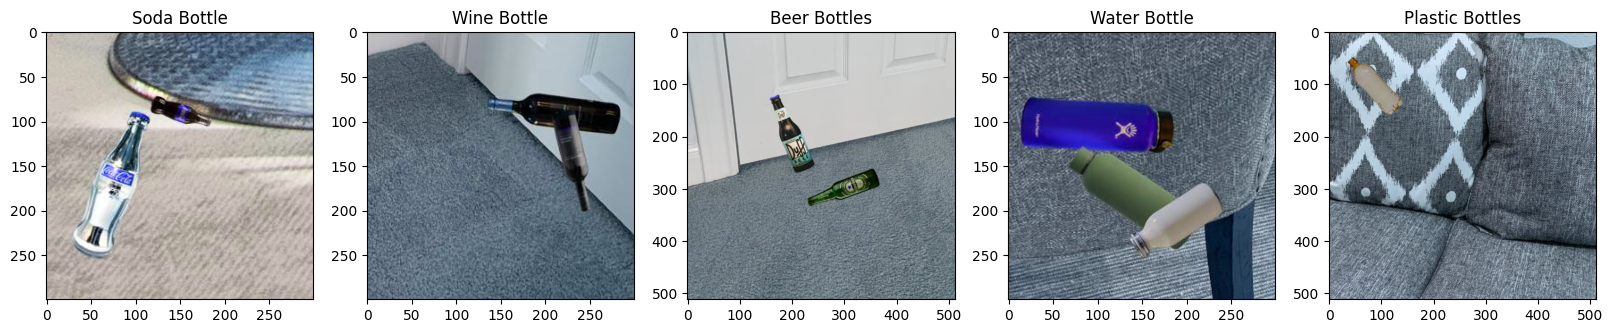

In [ ]:
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(20, 10))
for index, folder in enumerate(os.listdir(base_dir)):
  path_folder = os.path.join(base_dir, folder)
  if os.path.isdir(path_folder):
    for index_file, file_name in enumerate(os.listdir(path_folder)):
      if index_file < 5:
        img = cv2.imread(os.path.join(base_dir, folder, file_name))
        plt.subplot(1, len(os.listdir(base_dir)), index + 1)
        plt.imshow(img)
        plt.title(folder)

In [ ]:
list_img = os.listdir(base_dir)
print(list_img)

['Soda Bottle', 'Wine Bottle', 'Beer Bottles', 'Water Bottle', 'Plastic Bottles']


In [ ]:
from PIL import Image
total = 0

for x in list_img:
  dir = os.path.join(base_dir, x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total = total + y

  img_name = os.listdir(dir)
  for z in range(4):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)
    print('-',img.size)
  print('---------------')

print('\nTotal :', total)

Soda Bottle: 5000
- (300, 300)
- (300, 300)
- (300, 300)
- (300, 300)
---------------
Wine Bottle: 5000
- (300, 300)
- (300, 300)
- (300, 300)
- (300, 300)
---------------
Beer Bottles: 5000
- (512, 512)
- (512, 512)
- (512, 512)
- (512, 512)
---------------
Water Bottle: 5000
- (300, 300)
- (300, 300)
- (300, 300)
- (300, 300)
---------------
Plastic Bottles: 5000
- (512, 512)
- (512, 512)
- (512, 512)
- (512, 512)
---------------

Total : 25000


### Split Data Training dan Validation

In [ ]:
X = df['filepath']
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)

In [ ]:
df_train = pd.DataFrame({'filepath':X_train,
                         'label':y_train,
                         'set':'train'})

df_test = pd.DataFrame({'filepath':X_test,
                        'label':y_test,
                        'set':'test'})

In [ ]:
print('Data Train :', len(df_train))
print('Data Test :', len(df_test))

Data Train : 20000
Data Test : 5000


In [ ]:
# Menampilkan jumlah gambar setiap label pada train dan test
print('=============== TRAIN =============== \n')
print(df_train.groupby(['label']).size(),'\n')

print('=============== TEST ================ \n')
print(df_test.groupby(['label']).size(),'\n')

=============== TRAIN =============== 

label
Beer Bottles       3995
Plastic Bottles    3942
Soda Bottle        4060
Water Bottle       4008
Wine Bottle        3995
dtype: int64 

=============== TEST ================ 

label
Beer Bottles       1005
Plastic Bottles    1058
Soda Bottle         940
Water Bottle        992
Wine Bottle        1005
dtype: int64 



##### Directory Train dan Test

In [ ]:
# Membuat direktori untuk train dan test
train_dir = base_dir + '/train'
test_dir = base_dir + '/test'
try:
    os.mkdir(train_dir)
    os.mkdir(test_dir)
except OSError:
    pass

In [ ]:
# Membuat direktori untuk setiap label pada direktori train dan test
label = df['label'].drop_duplicates().values

for l in label:
  try:
    os.mkdir(train_dir + '/' + l)
    os.mkdir(test_dir + '/' + l)
  except OSError:
      pass

In [ ]:
import shutil
from tqdm.notebook import tqdm as tq

# Memasukan file gambar untuk training ke setiap direktori label pada direktori train
for index, row in tq(df_train.iterrows()):
  filepath = row['filepath']
  if os.path.exists(filepath) == False:
    filepath = os.path.join(base_dir,row['label'], row['image'].split('.')[0])

  des_filename = filepath.split('/')[-1]
  dest_filepath = os.path.join(train_dir,row['label'],des_filename)

  if os.path.exists(dest_filepath) == False:
    shutil.copy2(filepath,dest_filepath)

0it [00:00, ?it/s]

In [ ]:
# Memasukan file gambar untuk testing ke setiap direktori label pada direktori test
for index, row in tq(df_test.iterrows()):
  filepath = row['filepath']
  if os.path.exists(filepath) == False:
    filepath = os.path.join(base_dir,row['label'], row['image'].split('.')[0])

  des_filename = filepath.split('/')[-1]
  dest_filepath = os.path.join(test_dir,row['label'],des_filename)

  if os.path.exists(dest_filepath) == False:
    shutil.copy2(filepath,dest_filepath)

0it [00:00, ?it/s]

### Augmentation & ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest'
)

val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest'
)

In [ ]:
data_train = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='categorical'
)

data_val = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='categorical'
)

num_class = data_val.num_classes

Found 20000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.


### Modeling

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if((logs.get('accuracy') > 0.92) and (logs.get('val_accuracy') > 0.92)):
      print("\n Accuracy > 92% training dihentikan")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(
    data_train,
    steps_per_epoch=30,
    epochs=30,
    validation_data=data_val,
    validation_steps=5,
    verbose=2,
    callbacks=[callbacks])

Epoch 1/30
30/30 - 101s - loss: 1.6577 - accuracy: 0.3253 - val_loss: 1.3736 - val_accuracy: 0.3640 - 101s/epoch - 3s/step
Epoch 2/30
30/30 - 97s - loss: 1.3897 - accuracy: 0.3473 - val_loss: 1.3789 - val_accuracy: 0.3800 - 97s/epoch - 3s/step
Epoch 3/30
30/30 - 96s - loss: 1.3320 - accuracy: 0.3920 - val_loss: 1.1629 - val_accuracy: 0.4800 - 96s/epoch - 3s/step
Epoch 4/30
30/30 - 95s - loss: 1.2404 - accuracy: 0.4573 - val_loss: 1.1605 - val_accuracy: 0.5080 - 95s/epoch - 3s/step
Epoch 5/30
30/30 - 92s - loss: 1.1669 - accuracy: 0.4927 - val_loss: 1.0305 - val_accuracy: 0.5760 - 92s/epoch - 3s/step
Epoch 6/30
30/30 - 96s - loss: 1.0470 - accuracy: 0.5453 - val_loss: 1.0103 - val_accuracy: 0.5320 - 96s/epoch - 3s/step
Epoch 7/30
30/30 - 98s - loss: 0.9767 - accuracy: 0.5947 - val_loss: 0.9424 - val_accuracy: 0.6000 - 98s/epoch - 3s/step
Epoch 8/30
30/30 - 94s - loss: 0.9529 - accuracy: 0.5947 - val_loss: 0.9212 - val_accuracy: 0.6200 - 94s/epoch - 3s/step
Epoch 9/30
30/30 - 91s - loss:

##### Plot of Accuracy

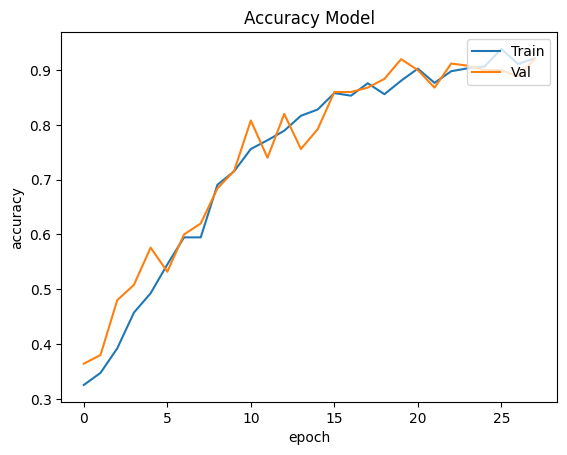

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

##### Plot of Loss

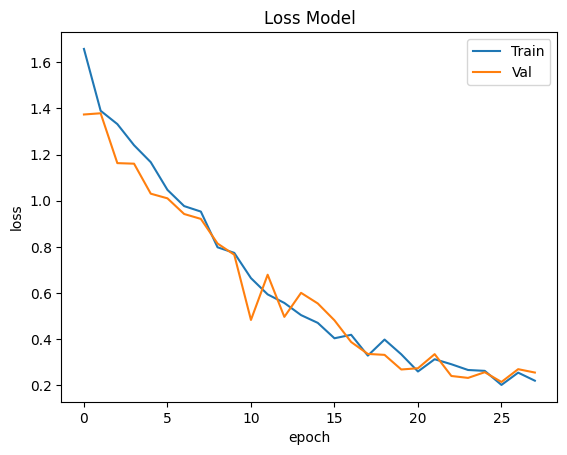

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Converter Model ke TF-Lite

In [ ]:
# Konversi model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
# Menyimpan model ke dalam format .tflite
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)